In [51]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, auc

from datetime import datetime
from lightgbm import LGBMClassifier 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [9]:
train_data = pd.read_csv('train.csv',index_col = 'Id')
test_data = pd.read_csv('test.csv', index_col = 'id')

In [10]:
train_data.head()


,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
Id,,,,,,,,,,,,
1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [11]:
test_data.head()


,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
id,,,,,,,,,,,
1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [14]:
train_data.shape

(252000, 12)

In [15]:
test_data.shape

(28000, 11)

In [16]:
train_data.isnull().sum()


income                 0
age                    0
experience             0
married                0
house_ownership        0
car_ownership          0
profession             0
city                   0
state                  0
current_job_years      0
current_house_years    0
risk_flag              0
dtype: int64

In [17]:
test_data.isnull().sum()

income                 0
age                    0
experience             0
married                0
house_ownership        0
car_ownership          0
profession             0
city                   0
state                  0
current_job_years      0
current_house_years    0
dtype: int64

In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 1 to 252000
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   income               252000 non-null  int64 
 1   age                  252000 non-null  int64 
 2   experience           252000 non-null  int64 
 3   married              252000 non-null  object
 4   house_ownership      252000 non-null  object
 5   car_ownership        252000 non-null  object
 6   profession           252000 non-null  object
 7   city                 252000 non-null  object
 8   state                252000 non-null  object
 9   current_job_years    252000 non-null  int64 
 10  current_house_years  252000 non-null  int64 
 11  risk_flag            252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 25.0+ MB


In [19]:
train_data.describe()

,income,age,experience,current_job_years,current_house_years,risk_flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,2.878311e+06,17.063863,6.002590,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [20]:
cat_features = train_data.select_dtypes(['object']).columns
cat_features

Index(['married', 'house_ownership', 'car_ownership', 'profession', 'city',
       'state'],
      dtype='object')

In [21]:
for col in cat_features:
    print(train_data[col].nunique())

2
3
2
51
317
29


In [22]:
le = LabelEncoder()
for col in cat_features:
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.fit_transform(test_data[col])

In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 1 to 252000
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   income               252000 non-null  int64
 1   age                  252000 non-null  int64
 2   experience           252000 non-null  int64
 3   married              252000 non-null  int64
 4   house_ownership      252000 non-null  int64
 5   car_ownership        252000 non-null  int64
 6   profession           252000 non-null  int64
 7   city                 252000 non-null  int64
 8   state                252000 non-null  int64
 9   current_job_years    252000 non-null  int64
 10  current_house_years  252000 non-null  int64
 11  risk_flag            252000 non-null  int64
dtypes: int64(12)
memory usage: 25.0 MB


In [24]:
train_data.describe()

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,0.897905,1.891722,0.301587,25.276746,158.137675,13.808952,6.333877,11.997794,0.123000
std,2.878311e+06,17.063863,6.002590,0.302774,0.391880,0.458948,14.728537,92.201736,9.372300,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,1.000000,2.000000,0.000000,13.000000,78.000000,6.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,1.000000,2.000000,0.000000,26.000000,157.000000,14.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,1.000000,2.000000,1.000000,38.000000,238.000000,22.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,1.000000,2.000000,1.000000,50.000000,316.000000,28.000000,14.000000,14.000000,1.000000


In [25]:
train_data['income'].nunique()

41917

In [26]:
sc = StandardScaler()
col = 'income'
train_data[col] = sc.fit_transform(train_data[col].values.reshape(-1,1))
test_data[col] = sc.transform(test_data[col].values.reshape(-1,1))

In [27]:
train_data['age'].nunique()

59

In [28]:
sc = StandardScaler()
col = 'age'
train_data[col] = sc.fit_transform(train_data[col].values.reshape(-1,1))
test_data[col] = sc.transform(test_data[col].values.reshape(-1,1))

In [29]:
train_data['experience'].nunique()

21

In [30]:
sc = StandardScaler()
col = 'experience'
train_data[col] = sc.fit_transform(train_data[col].values.reshape(-1,1))
test_data[col] = sc.transform(test_data[col].values.reshape(-1,1))

In [31]:
train_data['profession'].nunique()

51

In [32]:
sc = StandardScaler()
col = 'profession'
train_data[col] = sc.fit_transform(train_data[col].values.reshape(-1,1))
test_data[col] = sc.transform(test_data[col].values.reshape(-1,1))

In [33]:
sc = StandardScaler()
col = 'city'
train_data[col] = sc.fit_transform(train_data[col].values.reshape(-1,1))
test_data[col] = sc.transform(test_data[col].values.reshape(-1,1))

In [34]:
sc = StandardScaler()
col = 'state'
train_data[col] = sc.fit_transform(train_data[col].values.reshape(-1,1))
test_data[col] = sc.transform(test_data[col].values.reshape(-1,1))

In [35]:
train_data['current_job_years'].nunique()

15

In [36]:
sc = StandardScaler()
col = 'current_job_years'
train_data[col] = sc.fit_transform(train_data[col].values.reshape(-1,1))
test_data[col] = sc.transform(test_data[col].values.reshape(-1,1))

In [37]:
sc = StandardScaler()
col = 'current_house_years'
train_data[col] = sc.fit_transform(train_data[col].values.reshape(-1,1))
test_data[col] = sc.transform(test_data[col].values.reshape(-1,1))

In [38]:
train_data.head()

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
Id,,,,,,,,,,,,
1,-1.283145,-1.579603,-1.180232,1,2,0,0.524374,1.007167,-0.086313,-0.914131,0.716356,0
2,0.895457,-0.583343,-0.014067,1,2,0,1.203330,0.746867,0.020384,0.731036,0.716356,0
3,-0.349269,0.940347,-1.013637,0,2,0,1.474912,-1.628364,-0.193011,-0.639936,-1.427981,0
4,0.437526,-0.524740,-1.346827,1,2,1,1.203330,-1.129457,0.340477,-1.188325,0.001577,1
5,0.268128,-0.173119,0.152528,1,2,0,-0.969327,1.495228,0.873965,-0.914131,1.431135,1


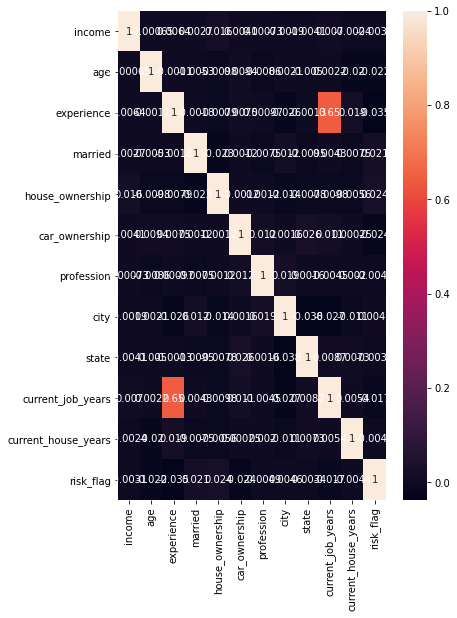

In [39]:
plt.figure(figsize = (6,9))
sns.heatmap(train_data.corr(),annot = True, cbar = True)
plt.show()

In [40]:
y = train_data.loc[:,'risk_flag']
X = train_data.drop('risk_flag', axis = 1)
X

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
Id,,,,,,,,,,,
1,-1.283145,-1.579603,-1.180232,1,2,0,0.524374,1.007167,-0.086313,-0.914131,0.716356
2,0.895457,-0.583343,-0.014067,1,2,0,1.203330,0.746867,0.020384,0.731036,0.716356
3,-0.349269,0.940347,-1.013637,0,2,0,1.474912,-1.628364,-0.193011,-0.639936,-1.427981
4,0.437526,-0.524740,-1.346827,1,2,1,1.203330,-1.129457,0.340477,-1.188325,0.001577
5,0.268128,-0.173119,0.152528,1,2,0,-0.969327,1.495228,0.873965,-0.914131,1.431135
...,...,...,...,...,...,...,...,...,...,...,...
251996,1.097092,-0.407533,0.485719,1,2,0,1.339121,0.041890,1.514151,-0.091547,-0.713202
251997,-0.748199,-1.403792,-0.014067,1,2,0,-1.512492,1.007167,-0.086313,-0.091547,-0.713202
251998,-0.164913,-0.231722,-0.513852,1,2,0,-0.561954,-0.153334,0.020384,0.182647,0.001577


In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [42]:
params={
 "learning_rate"    : [0.01, 0.02,0.03,0.04,0.05,0.06,0.8,1 ] ,
 "reg_lambda"       : [1,2,3,4,5,6,7],
 "n_estimators"     : [200, 300, 400, 500, 600, 700,800],
 "max_depth"        : [2, 3, 4, 5, 6,7, 8,9, 10,11, 12,13,14, 15],
 "reg_alpha"        : [1,2,3,4,5,6,7],
 
 "min_child_weight" : [ 0.001,0.005,0.009,0.005,0.01,0.02,0.04,0.07,0.1,0.5,1,5,8 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4, 0.5, 0.6, 0.7,0.8, 0.9 ],
 "colsample_bytree" : [ 0.05,0.1,0.2,0.3, 0.4, 0.5 ,0.6, 0.7 ]
    
}

In [43]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [46]:
classifier=LGBMClassifier()

In [49]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=20,scoring='roc_auc',n_jobs=-1,cv=8,verbose=3)

In [52]:
start_time = timer(None) 
random_search.fit(x_train,y_train)
timer(start_time)

Fitting 8 folds for each of 20 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 13.5min finished



 Time taken: 0 hours 13 minutes and 35.69 seconds.


In [53]:
random_search.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.7,
               gamma=0.9, importance_type='split', learning_rate=0.06,
               max_depth=10, min_child_samples=20, min_child_weight=8,
               min_split_gain=0.0, n_estimators=600, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=6, reg_lambda=6,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [54]:
random_search.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.9,
 'learning_rate': 0.06,
 'max_depth': 10,
 'min_child_weight': 8,
 'n_estimators': 600,
 'reg_alpha': 6,
 'reg_lambda': 6}

In [55]:

model = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.7,
               gamma=.9, importance_type='split', learning_rate=0.06,
               max_depth=10, min_child_samples=20, min_child_weight=8,
               min_split_gain=0.0, n_estimators=600, n_jobs=-1,is_unbalance = True, num_leaves=31,
               objective='binary',metric = 'auc', random_state=294, reg_alpha=6, reg_lambda=6,
               silent=True, subsample=1.0,njobs = -1, subsample_for_bin=200000,
               subsample_freq=0)
clf = model.fit(x_train, y_train)

In [56]:
roc_auc_score(y_train, clf.predict(x_train))

0.8647153855272584

In [57]:

roc_auc_score(y_test,clf.predict_proba(x_test)[:,1])

0.8876706114833854

In [61]:
y_pred = clf.predict(test_data)


In [62]:
y_pred

array([0, 0, 0, ..., 0, 1, 1])

In [67]:
sub = pd.DataFrame(y_pred,columns = ['risk_flag'],index = [i+1 for i in range(test_data.shape[0])])

sub.index.name = 'id'
sub.tail()
sub.head()

,risk_flag
id,
1,0
2,0
3,0
4,0
5,0


In [69]:
sub.to_csv('sub1.csv')